In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import pandas as pd
# import geopandas as gpd

In [2]:
path='/shared/obs/gridded/GHCN_CAMS/'
file='air.mon.mean.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds
proj=ccrs.PlateCarree()


In [4]:
#  REVERSE OUR Latitudes
ds = ds.reindex(lat=list(reversed(ds['lat'])))

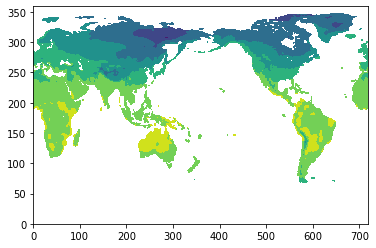

In [5]:
#  PLOT our data to make sure we have the right dataset.
plt.contourf(ds['air'][0,:,:])

In [6]:
# Shift longitudes to run from -180 to +180
ds=ds.assign_coords(lon=(((ds['lon']+180) % 360))-180)
ds=ds.sortby(ds['lon'])
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 867)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

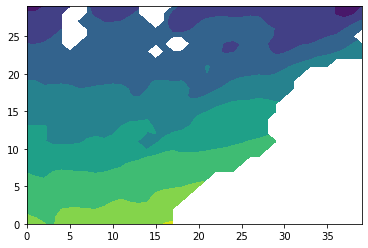

In [7]:
#
# Define the reigion of interest--Northeastern United States/
#
ds_region=ds.sel(lon=slice(-90,-70),lat=slice(30,45))
ds_region
plt.contourf(ds_region['air'][0,:,:])

In [8]:
# Select time of investigation from January, 2009 through December, 2019 = 11 years, giving 132 time points.
ds_region=ds_region.sel(time=slice('2009-01-01', '2019-12-01'))
ds_region



<xarray.Dataset>
Dimensions:  (lat: 30, lon: 40, time: 132)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 43.25 43.75 44.25 44.75
  * lon      (lon) float32 -89.75 -89.25 -88.75 -88.25 ... -71.25 -70.75 -70.25
  * time     (time) datetime64[ns] 2009-01-01 2009-02-01 ... 2019-12-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

In [9]:
#
# Look at average values of temperature.
ds_regionm=ds_region.groupby('time.month').mean(dim='time')
ds_regionm


<xarray.Dataset>
Dimensions:  (lat: 30, lon: 40, month: 12)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 43.25 43.75 44.25 44.75
  * lon      (lon) float32 -89.75 -89.25 -88.75 -88.25 ... -71.25 -70.75 -70.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 284.72546 284.2109 ... 265.4027 267.68454

Text(0.5, 0.98, 'December Air Temperature (Kelvin) for NE U.S')

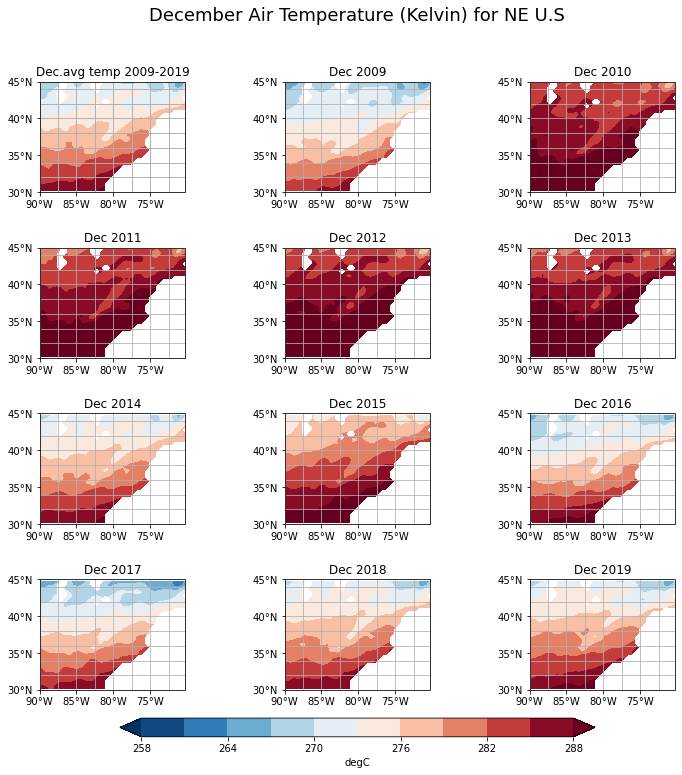

In [10]:
#
#  Set up subplots using fig and axs features
#
#  Contour plot air temperatures in the Northeast U.S for every December from 2009 to 2019.
#
#  Plot December air temperature for each year.
#

fig,axs=plt.subplots(nrows=4, ncols=3,
                    subplot_kw={'projection':ccrs.PlateCarree()},
                    figsize=(11,13))
alevels=np.arange(258,291,3)
ax=plt.gca
axs[0,0].contourf(ds_regionm['lon'],ds_regionm['lat'], ds_regionm['air'][11,:,:],cmap='RdBu_r',
        transform=ccrs.PlateCarree(),extend='both',levels=alevels)
axs[0,1].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][11,:,:],cmap='RdBu_r',
        transform=ccrs.PlateCarree(),extend='both',levels=alevels)
axs[0,2].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][33,:,:],cmap='RdBu_r',
        transform=ccrs.PlateCarree(),extend='both',levels=alevels)
axs[1,0].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][45,:,:],cmap='RdBu_r',
        transform=ccrs.PlateCarree(),extend='both',levels=alevels)
axs[1,1].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][57,:,:],cmap='RdBu_r',
     transform=ccrs.PlateCarree(),extend='both',levels=alevels)
axs[1,2].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][69,:,:],
    cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both',levels=alevels)        
axs[2,0].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][71,:,:],
    cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both',levels=alevels) 
axs[2,1].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][83,:,:],
    cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both',levels=alevels) 
axs[2,2].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][95,:,:],
    cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both',levels=alevels) 
axs[3,0].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][107,:,:],
    cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both',levels=alevels) 
axs[3,1].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][119,:,:],
    cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both',levels=alevels) 
axs[3,2].contourf(ds_region['lon'],ds_region['lat'], ds_region['air'][131,:,:],
    cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both',levels=alevels)      

axs[0, 0].set_title('Dec.avg temp 2009-2019')
axs[0, 0].gridlines()
axs[0, 1].set_title('Dec 2009')
axs[0, 2].set_title('Dec 2010')
axs[1,0].set_title('Dec 2011')
axs[1, 1].set_title('Dec 2012')
axs[1,2].set_title('Dec 2013')
axs[2,0].set_title('Dec 2014')
axs[2,1].set_title('Dec 2015')
axs[2,2].set_title('Dec 2016')
axs[3,0].set_title('Dec 2017')
axs[3,1].set_title('Dec 2018')
axs[3,2].set_title('Dec 2019')
axxs=axs.flatten()
cs= axs[0,0].contourf(ds_regionm['lon'],ds_regionm['lat'], ds_regionm['air'][11,:,:],cmap='RdBu_r',
        transform=ccrs.PlateCarree(),extend='both',levels=alevels)
for i in range(12):
    axxs[i].gridlines()
    # Longitude labels
    axxs[i].set_xticks(np.arange(-90,-70, 5),crs=ccrs.PlateCarree())
    lon_formatter=cticker.LongitudeFormatter()
    axxs[i].xaxis.set_major_formatter(lon_formatter)
    
    # Latitude labels
    axxs[i].set_yticks(np.arange(30,50,5),crs=ccrs.PlateCarree())
    lat_formatter=cticker.LatitudeFormatter()
    axxs[i].yaxis.set_major_formatter(lat_formatter)
    
cbar_ax=fig.add_axes([0.2,0.2,0.6,0.02])
# Make room for colorbar
fig.subplots_adjust(bottom=0.25,top=0.9,left=0.05,right=0.95,
                  wspace=0.1,hspace=0.5)

cbar = plt.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='degC',)
plt.savefig('colorbar_positioning_03.png', format='png', bbox_inches='tight')
plt.suptitle('December Air Temperature (Kelvin) for NE U.S',fontsize = 18)    